In [1]:
import networkx as nx
from torch_geometric.utils import to_networkx

In [2]:
import pickle 

import numpy as np
import torch
from torch_cluster import radius_graph
from torch_geometric.data import Data
import time


import random
from torch_geometric.utils import from_networkx




N = 1000
skip = 10 
r = 0.1

In [3]:
pos = torch.rand(N,2)

In [4]:
positions = [ ]

In [5]:
for i in range(10,1000,10):
    p = torch.ones(len(pos))*1/len(pos)
    replace = False
    idx = p.multinomial(num_samples=i, replacement=replace)
    b = pos[idx]
    positions.append(b)

In [6]:
positions.append(pos)

In [7]:
import os.path as osp
import pickle

import torch
from torch_geometric.data import Dataset, download_url

#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pickle #for saving and loading the dataset

import numpy as np
import networkx as nx
import torch
from torch_geometric.data import Data
import time


# In[2]:


import random
from torch_geometric.utils import from_networkx

import matplotlib.pyplot as plt
import os

In [8]:
class RGGDataset(Dataset):
    
    def __init__(self, root, roottransform=None, pre_transform=None, size=1000, skip=10,  radius=0.5):
        """
        root = where the dataset should be stored. 
        This folder is split into raw_dir (downloaded dataset) and processed_dir (processed data)

        """
        #super(RGGDataset, self).__init__(root, transform, pre_transform)
        self.size = size
        self.skip = skip
        self.root = root
        self.radius = radius
        self.number = int(self.size/self.skip)
    
    
    @property
    def raw_file_names(self):
        """ If this file exists in raw_dir, the download is not triggered.
            (The download func. is not implemented here)  
        """
        return [f'graph_r{int(radius*10)}_{int(i*self.skip)}.pt' for i in range(1,self.number)]
    
    @property
    def processed_file_names(self):
        """ If these files are found in processed_dir, processing is skipped"""
        
        return [f'graph_r{int(self.radius*10)}_{int(i*self.skip)}.pt' for i in range(1, self.number)]
    
    def download(self):
        if osp.isfile(self.root + '/raw/positions_{self.size}_{self.skip}.pt'):
            print('already downloaded')
            pass
        #we dont really download anything graph_signal_10001.pickle
        pos = torch.rand(self.size,2)
        positions = [ ]
        for i in range(10,1000,10):
            p = torch.ones(len(pos))*1/len(pos)
            idx = p.multinomial(num_samples=i, replacement=False)
            b = pos[idx]
            positions.append([b, idx])
        positions.append([pos, torch.range(0,999)])
        torch.save(positions, 
            os.path.join(self.raw_dir, 
                f'positions_{self.size}_{self.skip}.pt'))
        #print('triggered')
        return [f'positions_{self.size}_{self.skip}.pt']
    """
    def download(self):
        pass
    """    

    def process(self): 
        positions = torch.load(osp.join(self.raw_dir, f'positions_{self.size}_{self.skip}.pt'))
        
        for i in range(1,self.number+1):
            #print(i)
            #print(len(positions[i-1][0]))
            batch = torch.zeros(int(i*self.skip)).type(torch.LongTensor)
            edge_index = radius_graph(positions[i-1][0], r=self.radius, batch=batch, loop=False)
            graph  = Data(edge_index = edge_index)
            #graphs.append(graph)
            torch.save(graph, 
                os.path.join(self.processed_dir, 
                    f'graph_r{int(self.radius*10)}_{int(i*self.skip)}.pt'))
            #nx.draw(to_networkx(graph))
            
    def len(self):
        return len(self.size)

    def get(self, radius, graphsize):
        data = torch.load(osp.join(self.processed_dir, 'graph_r{radius}_{graphsize}.pt'.format(radius=radius, graphsize=graphsize)))
        return data
    

In [9]:
DL = RGGDataset(root = '//home/groups/ai/maskey/input_rad', radius=1)

In [11]:
for i in range(1,11):
    DL = RGGDataset(root = '//home/groups/ai/maskey/input_rad', radius=i/10)
    DL.process()

1
10
2
20
3
30
4
40
5
50
6
60
7
70
8
80
9
90
10
100
11
110
12
120
13
130
14
140
15
150
16
160
17
170
18
180
19
190
20
200
21
210
22
220
23
230
24
240
25
250
26
260
27
270
28
280
29
290
30
300
31
310
32
320
33
330
34
340
35
350
36
360
37
370
38
380
39
390
40
400
41
410
42
420
43
430
44
440
45
450
46
460
47
470
48
480
49
490
50
500
51
510
52
520
53
530
54
540
55
550
56
560
57
570
58
580
59
590
60
600
61
610
62
620
63
630
64
640
65
650
66
660
67
670
68
680
69
690
70
700
71
710
72
720
73
730
74
740
75
750
76
760
77
770
78
780
79
790
80
800
81
810
82
820
83
830
84
840
85
850
86
860
87
870
88
880
89
890
90
900
91
910
92
920
93
930
94
940
95
950
96
960
97
970
98
980
99
990
100
1000
1
10
2
20
3
30
4
40
5
50
6
60
7
70
8
80
9
90
10
100
11
110
12
120
13
130
14
140
15
150
16
160
17
170
18
180
19
190
20
200
21
210
22
220
23
230
24
240
25
250
26
260
27
270
28
280
29
290
30
300
31
310
32
320
33
330
34
340
35
350
36
360
37
370
38
380
39
390
40
400
41
410
42
420
43
430
44
440
45
450
46
460
47
470
48
48

/home/math/maskey/anaconda3/envs/pyg_cuda102/lib/python3.8/site-packages/torch_geometric/data/storage.py:244: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


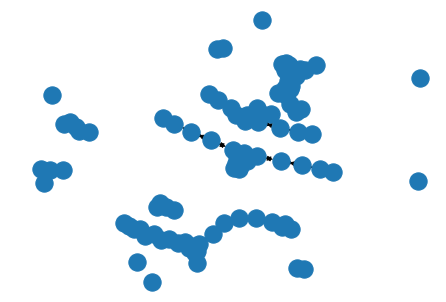

In [12]:
nx.draw(to_networkx(DL.get(1,100)))

/home/math/maskey/anaconda3/envs/pyg_cuda102/lib/python3.8/site-packages/torch_geometric/data/storage.py:244: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


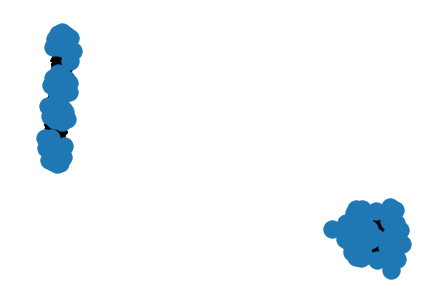

In [28]:
nx.draw(to_networkx(DL.get(9,100)))

In [22]:
positions = torch.load(osp.join('//home/groups/ai/maskey/input_rad/raw', 'positions_1000_10.pt'))

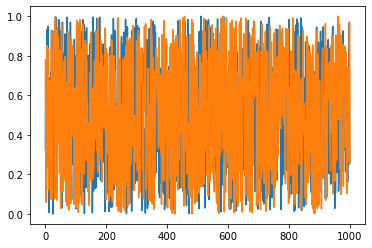

In [23]:
plt.plot(positions[99][0])

In [25]:
positions[99][0]

tensor([[0.3283, 0.7796],
        [0.7071, 0.3431],
        [0.7071, 0.0593],
        ...,
        [0.9646, 0.3541],
        [0.6103, 0.9702],
        [0.2574, 0.2598]])

In [19]:
hi  =DL.get(1,20)

In [20]:
hi.num_nodes

11

In [26]:
from torch_geometric.utils import degree

In [33]:
degree(DL.get(1,100).edge_index[0])

tensor([4., 1., 2., 5., 7., 1., 2., 2., 0., 2., 1., 3., 4., 1., 1., 7., 2., 2.,
        1., 5., 3., 3., 1., 1., 2., 2., 2., 0., 2., 2., 3., 7., 0., 4., 2., 4.,
        2., 1., 2., 5., 4., 3., 4., 3., 6., 2., 5., 4., 2., 3., 5., 5., 4., 5.,
        6., 4., 1., 2., 5., 3., 5., 4., 0., 2., 2., 6., 2., 4., 8., 3., 2., 4.,
        1., 0., 2., 1., 6., 4., 5., 3., 6., 0., 2., 2., 2., 1., 3., 0., 4., 2.,
        4., 2., 2., 6., 7., 2., 1., 3., 7., 5.])

In [32]:
print(DL.get(9,100).edge_index.detach().tolist())

[[22, 78, 20, 3, 55, 68, 88, 35, 33, 50, 64, 93, 28, 39, 48, 31, 98, 76, 24, 82, 77, 70, 16, 7, 92, 15, 32, 47, 94, 4, 51, 40, 26, 73, 18, 56, 74, 21, 23, 75, 85, 49, 63, 5, 27, 29, 24, 82, 77, 70, 16, 7, 92, 15, 32, 47, 94, 4, 51, 40, 22, 78, 0, 20, 36, 43, 14, 11, 67, 12, 52, 45, 83, 19, 87, 42, 65, 81, 96, 59, 10, 69, 37, 57, 66, 61, 95, 84, 6, 72, 30, 86, 90, 44, 91, 79, 22, 78, 0, 20, 55, 68, 88, 35, 33, 50, 64, 93, 28, 39, 48, 31, 98, 76, 24, 82, 77, 70, 16, 7, 92, 15, 32, 47, 94, 4, 51, 40, 92, 15, 32, 47, 94, 51, 40, 24, 82, 77, 70, 16, 7, 33, 50, 64, 93, 28, 39, 48, 31, 98, 76, 22, 78, 0, 20, 3, 55, 68, 88, 35, 75, 85, 49, 63, 27, 29, 1, 26, 73, 18, 56, 74, 21, 23, 22, 78, 0, 20, 3, 55, 68, 88, 35, 33, 50, 64, 93, 28, 39, 48, 31, 98, 37, 57, 66, 61, 95, 84, 81, 96, 59, 10, 69, 52, 45, 83, 19, 87, 42, 65, 36, 43, 14, 11, 2, 67, 12, 53, 38, 13, 89, 8, 9, 34, 24, 82, 77, 70, 16, 92, 15, 32, 47, 94, 4, 51, 40, 22, 78, 0, 20, 3, 55, 68, 88, 35, 33, 50, 64, 93, 28, 39, 48, 31, 98, 7

In [36]:
positions[10][0]

tensor([[0.1747, 0.7262],
        [0.1692, 0.5960],
        [0.1126, 0.6011],
        [0.0565, 0.8662],
        [0.2315, 0.5419],
        [0.5548, 0.2322],
        [0.1679, 0.3949],
        [0.9556, 0.3304],
        [0.2322, 0.6499],
        [0.7140, 0.5040],
        [0.8375, 0.8395],
        [0.6804, 0.7764],
        [0.6181, 0.3593],
        [0.5526, 0.9326],
        [0.4333, 0.0260],
        [0.1536, 0.7021],
        [0.2041, 0.8051],
        [0.0352, 0.7853],
        [0.3440, 0.7724],
        [0.4717, 0.0457],
        [0.2118, 0.5419],
        [0.3799, 0.7192],
        [0.9445, 0.9254],
        [0.4357, 0.1725],
        [0.0148, 0.5884],
        [0.8222, 0.7280],
        [0.3695, 0.0303],
        [0.0230, 0.3068],
        [0.1254, 0.5558],
        [0.5989, 0.0373],
        [0.8978, 0.2716],
        [0.2009, 0.4565],
        [0.0042, 0.8585],
        [0.1743, 0.7216],
        [0.0986, 0.0148],
        [0.2530, 0.1034],
        [0.9447, 0.3497],
        [0.7719, 0.6260],
        [0.3